In [1]:
import scipy
import numpy as np
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.impute import KNNImputer
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [2]:
data = pd.read_csv('C:/Users/hp/Documents/kaam/Thesis projects/Hospital deaths prediction/archive/Dataset.csv')
target = data['hospital_death']

In [3]:
test = pd.read_csv('C:/Users/hp/Documents/kaam/Thesis projects/Hospital deaths prediction/archive/Dataset.csv')

In [4]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [5]:
data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
display(data.isnull().sum())

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [7]:
data_check = data
data_check.dropna(axis=1, how='all')

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [8]:
perc = 20.0 # Like N %
min_count =  int(((100-perc)/100)*data_check.shape[0] + 1)
data_check = data_check.dropna( axis=1, 
                thresh=min_count)
data_check

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [9]:
data_check_num = data_check.select_dtypes(np.number)
data_check_num

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.0,22.730000,0,180.3,92,0.541667,...,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.0,27.420000,0,160.0,90,0.927778,...,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119783,50777,118,0,25.0,31.950000,0,172.7,93,0.000694,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.0,22.640000,1,165.1,92,0.000694,...,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.0,NaN,0,188.0,91,0.073611,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,177.8,927,0.298611,...,0.12,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,66119,13486,121,0,56.0,47.179671,0,183.0,925,0.120139,...,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,8981,58179,195,0,48.0,27.236914,0,170.2,908,0.046528,...,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,33776,120598,66,0,NaN,23.297481,0,154.9,922,0.081944,...,0.07,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
knn = KNNImputer()

data_check_num_transformed = knn.fit_transform(data_check_num)
data_check_num = pd.DataFrame(data_check_num_transformed, columns=data_check_num.columns, index=data_check.index)

In [11]:
data_check_num

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154.0,25312.0,118.0,0.0,68.0,22.730000,0.0,180.3,92.0,0.541667,...,0.100,0.050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252.0,59342.0,81.0,0.0,77.0,27.420000,0.0,160.0,90.0,0.927778,...,0.470,0.290,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119783.0,50777.0,118.0,0.0,25.0,31.950000,0.0,172.7,93.0,0.000694,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267.0,46918.0,118.0,0.0,81.0,22.640000,1.0,165.1,92.0,0.000694,...,0.040,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056.0,34377.0,33.0,0.0,19.0,23.450505,0.0,188.0,91.0,0.073611,...,0.176,0.098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592.0,78108.0,30.0,0.0,75.0,23.060250,0.0,177.8,927.0,0.298611,...,0.120,0.050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,66119.0,13486.0,121.0,0.0,56.0,47.179671,0.0,183.0,925.0,0.120139,...,0.030,0.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,8981.0,58179.0,195.0,0.0,48.0,27.236914,0.0,170.2,908.0,0.046528,...,0.050,0.020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,33776.0,120598.0,66.0,0.0,53.8,23.297481,0.0,154.9,922.0,0.081944,...,0.070,0.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data = data_check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 104 entries, encounter_id to apache_2_bodysystem
dtypes: float64(89), int64(8), object(7)
memory usage: 72.8+ MB


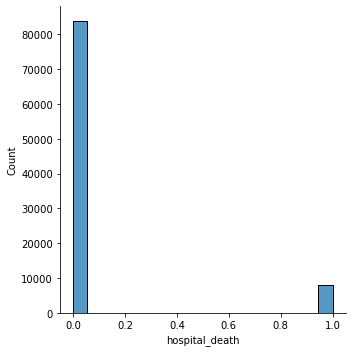

In [13]:
sns.displot(target)

In [14]:
data.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 104, dtype: int64

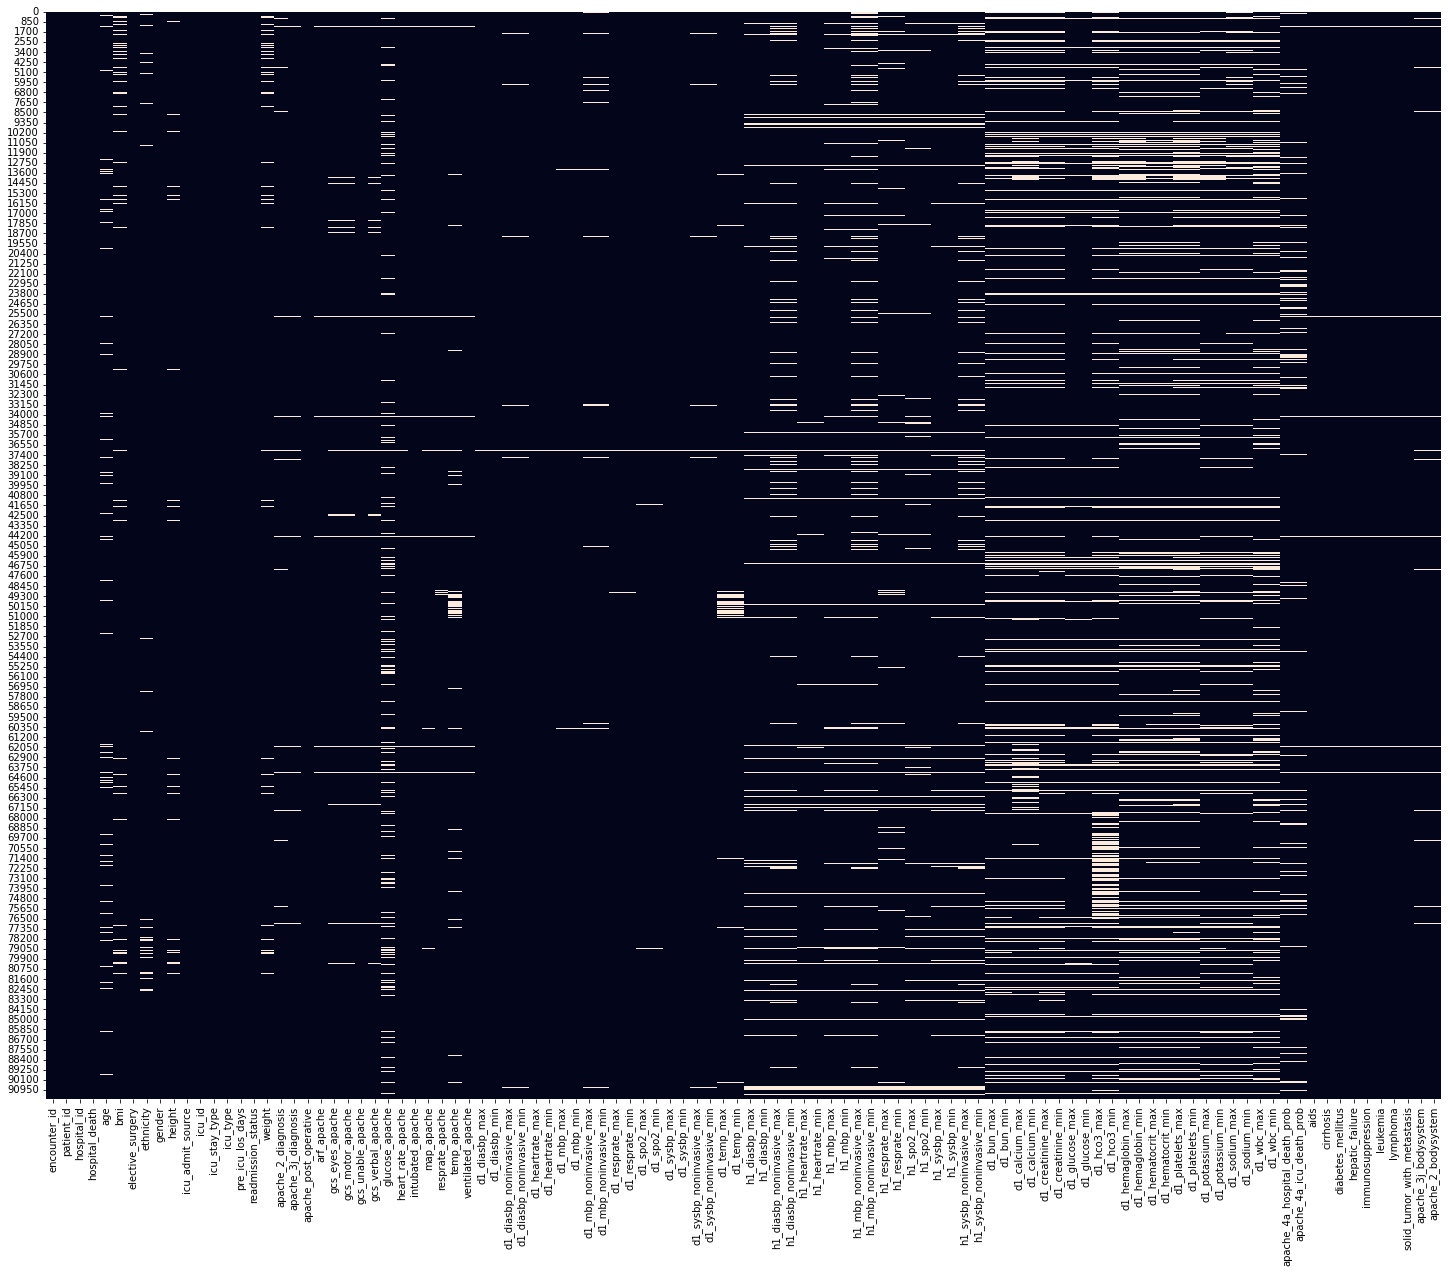

In [15]:
plt.figure(figsize = (25,20))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [16]:
data_num = data_check_num
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [17]:
data.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 104, dtype: int64

In [18]:
#imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')

In [19]:
#train_num = data_check.select_dtypes(np.number)
#imputer = imputer.fit(train_num)
 
# Imputing the data    
#train_num = imputer.transform(train_num)

In [20]:
#print(train_num)

In [21]:
#vnv = train_num.isna().columns

In [22]:
#data.isnull().mean() * 100

In [23]:
#knn = KNNImputer()

#train_num = data.select_dtypes(np.number)
#train_num
#train_num_miss = train_num.isna().columns

#train_num_transformed = knn.fit_transform(train_num)
#train_num = pd.DataFrame(train_num_transformed, columns=train_num.columns, index=data.index)
#for i in train_num.columns:
 #   train_num.fillna(i.mean())
    
#knn = KNNImputer()

#train_num = data_check.select_dtypes(np.number)
#train_num_transformed = knn.fit_transform(train_num)
#train_num = pd.DataFrame(train_num_transformed, columns=train_num.columns, index=data.index)

In [24]:
#data[train_num]

In [25]:
#train_num_miss

In [26]:

#for i in train_num.columns:
 #train_num[i].fillna(train_num[i].mean(), inplace=True)
#print(train_num)

In [27]:
data_num.isna().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
                              ..
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
Length: 97, dtype: int64

In [28]:
data_obj = data.select_dtypes('object')
data_obj

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...
91708,Caucasian,M,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [29]:
data_obj.isna().sum()

ethnicity               1395
gender                    25
icu_admit_source         112
icu_stay_type              0
icu_type                   0
apache_3j_bodysystem    1662
apache_2_bodysystem     1662
dtype: int64

In [30]:
for i in data_obj.columns:
 data_obj[i].fillna(data_obj[i].mode()[0], inplace=True)
print(data_obj)

       ethnicity gender           icu_admit_source icu_stay_type  \
0      Caucasian      M                      Floor         admit   
1      Caucasian      F                      Floor         admit   
2      Caucasian      F       Accident & Emergency         admit   
3      Caucasian      F  Operating Room / Recovery         admit   
4      Caucasian      M       Accident & Emergency         admit   
...          ...    ...                        ...           ...   
91708  Caucasian      M                      Floor         admit   
91709  Caucasian      F                      Floor         admit   
91710  Caucasian      M       Accident & Emergency         admit   
91711  Caucasian      F       Accident & Emergency         admit   
91712  Caucasian      F  Operating Room / Recovery         admit   

           icu_type apache_3j_bodysystem apache_2_bodysystem  
0             CTICU               Sepsis      Cardiovascular  
1      Med-Surg ICU          Respiratory         Respirat

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
data_obj.isna().sum()

ethnicity               0
gender                  0
icu_admit_source        0
icu_stay_type           0
icu_type                0
apache_3j_bodysystem    0
apache_2_bodysystem     0
dtype: int64

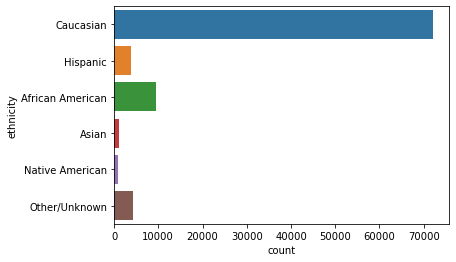

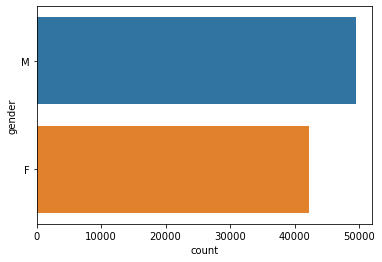

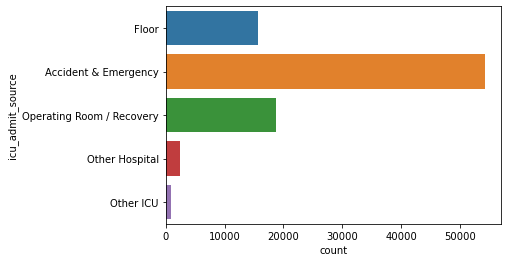

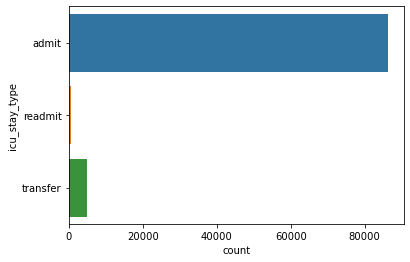

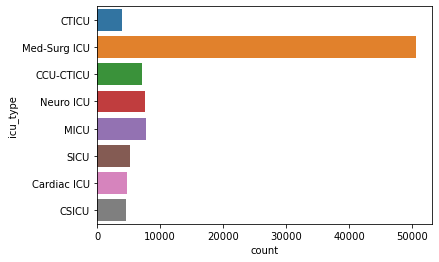

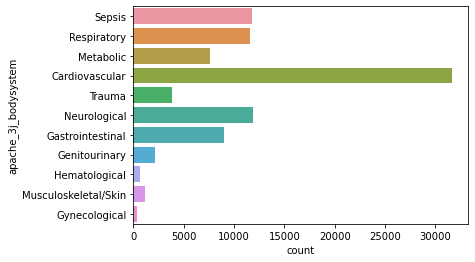

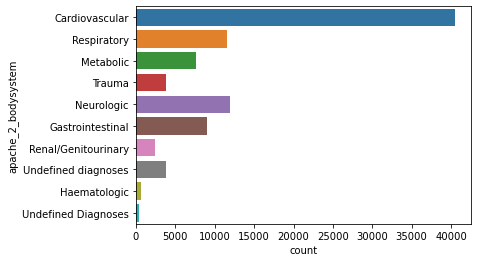

In [32]:
for col in data_obj:
    if data_obj[col].nunique() <= 22:
        sns.countplot(y=col, data=data_obj)
        plt.show()

In [33]:
data = pd.concat([data_num, data_obj], axis = 1)
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,66154.0,25312.0,118.0,0.0,68.0,22.730000,0.0,180.3,92.0,0.541667,...,0.0,0.0,0.0,Caucasian,M,Floor,admit,CTICU,Sepsis,Cardiovascular
1,114252.0,59342.0,81.0,0.0,77.0,27.420000,0.0,160.0,90.0,0.927778,...,0.0,0.0,0.0,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,119783.0,50777.0,118.0,0.0,25.0,31.950000,0.0,172.7,93.0,0.000694,...,0.0,0.0,0.0,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,79267.0,46918.0,118.0,0.0,81.0,22.640000,1.0,165.1,92.0,0.000694,...,0.0,0.0,0.0,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,92056.0,34377.0,33.0,0.0,19.0,23.450505,0.0,188.0,91.0,0.073611,...,0.0,0.0,0.0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592.0,78108.0,30.0,0.0,75.0,23.060250,0.0,177.8,927.0,0.298611,...,0.0,0.0,1.0,Caucasian,M,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,66119.0,13486.0,121.0,0.0,56.0,47.179671,0.0,183.0,925.0,0.120139,...,0.0,0.0,0.0,Caucasian,F,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,8981.0,58179.0,195.0,0.0,48.0,27.236914,0.0,170.2,908.0,0.046528,...,0.0,0.0,0.0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,33776.0,120598.0,66.0,0.0,53.8,23.297481,0.0,154.9,922.0,0.081944,...,0.0,0.0,0.0,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [34]:
data = pd.get_dummies(data)
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,66154.0,25312.0,118.0,0.0,68.0,22.730000,0.0,180.3,92.0,0.541667,...,1,0,0,0,0,0,0,0,0,0
1,114252.0,59342.0,81.0,0.0,77.0,27.420000,0.0,160.0,90.0,0.927778,...,0,0,0,0,0,0,1,0,0,0
2,119783.0,50777.0,118.0,0.0,25.0,31.950000,0.0,172.7,93.0,0.000694,...,0,0,0,1,0,0,0,0,0,0
3,79267.0,46918.0,118.0,0.0,81.0,22.640000,1.0,165.1,92.0,0.000694,...,1,0,0,0,0,0,0,0,0,0
4,92056.0,34377.0,33.0,0.0,19.0,23.450505,0.0,188.0,91.0,0.073611,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592.0,78108.0,30.0,0.0,75.0,23.060250,0.0,177.8,927.0,0.298611,...,1,0,0,0,0,0,0,0,0,0
91709,66119.0,13486.0,121.0,0.0,56.0,47.179671,0.0,183.0,925.0,0.120139,...,1,0,0,0,0,0,0,0,0,0
91710,8981.0,58179.0,195.0,0.0,48.0,27.236914,0.0,170.2,908.0,0.046528,...,0,0,0,1,0,0,0,0,0,0
91711,33776.0,120598.0,66.0,0.0,53.8,23.297481,0.0,154.9,922.0,0.081944,...,0,0,0,0,0,0,1,0,0,0


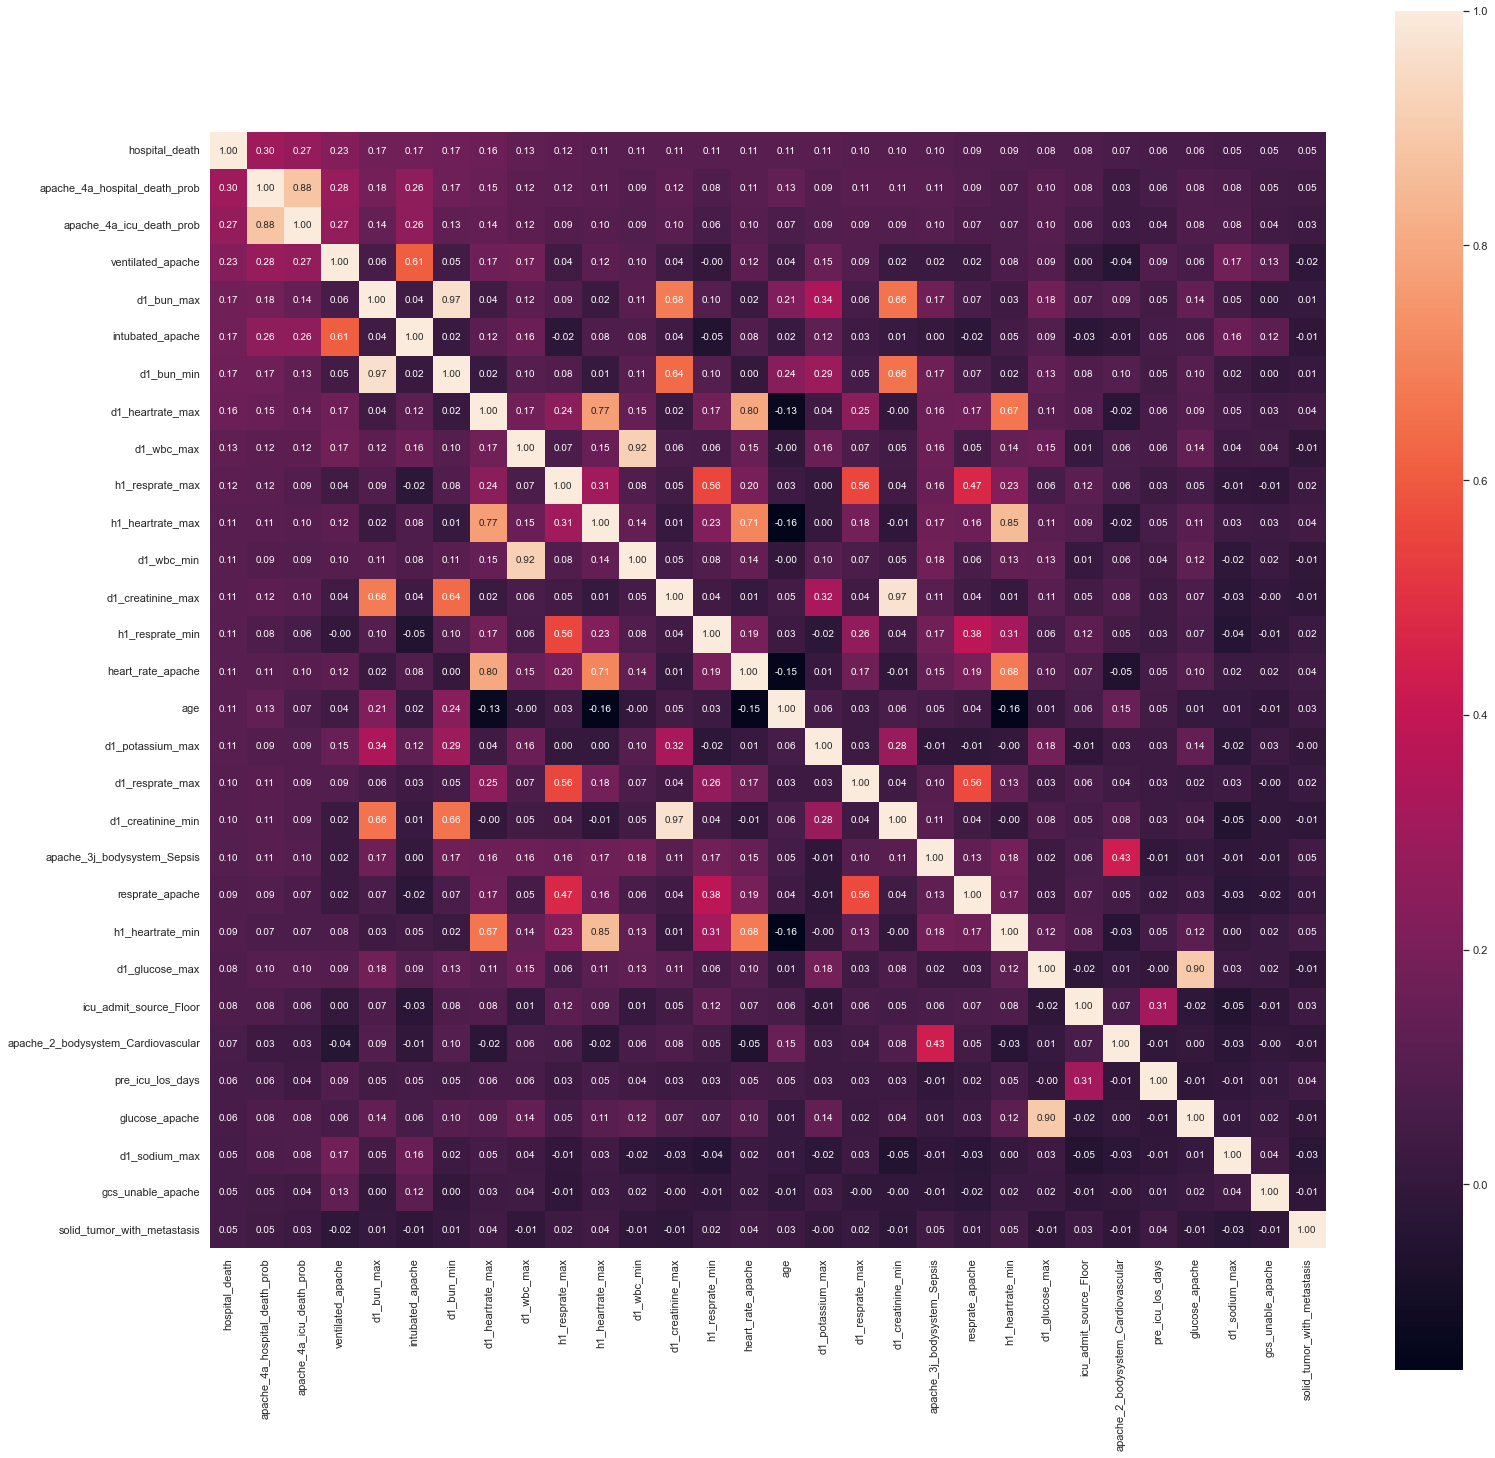

In [35]:
corrmat = data.corr()
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'hospital_death')['hospital_death'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
sns.set(rc = {'figure.figsize':(25,25)})
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
#data = data[cols]

In [37]:
X = data.loc[:,data.columns != 'hospital_death']
X

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,66154.0,25312.0,118.0,68.0,22.730000,0.0,180.3,92.0,0.541667,0.0,...,1,0,0,0,0,0,0,0,0,0
1,114252.0,59342.0,81.0,77.0,27.420000,0.0,160.0,90.0,0.927778,0.0,...,0,0,0,0,0,0,1,0,0,0
2,119783.0,50777.0,118.0,25.0,31.950000,0.0,172.7,93.0,0.000694,0.0,...,0,0,0,1,0,0,0,0,0,0
3,79267.0,46918.0,118.0,81.0,22.640000,1.0,165.1,92.0,0.000694,0.0,...,1,0,0,0,0,0,0,0,0,0
4,92056.0,34377.0,33.0,19.0,23.450505,0.0,188.0,91.0,0.073611,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592.0,78108.0,30.0,75.0,23.060250,0.0,177.8,927.0,0.298611,0.0,...,1,0,0,0,0,0,0,0,0,0
91709,66119.0,13486.0,121.0,56.0,47.179671,0.0,183.0,925.0,0.120139,0.0,...,1,0,0,0,0,0,0,0,0,0
91710,8981.0,58179.0,195.0,48.0,27.236914,0.0,170.2,908.0,0.046528,0.0,...,0,0,0,1,0,0,0,0,0,0
91711,33776.0,120598.0,66.0,53.8,23.297481,0.0,154.9,922.0,0.081944,0.0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
y = data['hospital_death']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

In [40]:
smote = SMOTE(random_state = 14)
X_train, y_train = smote.fit_resample(X_train, y_train)

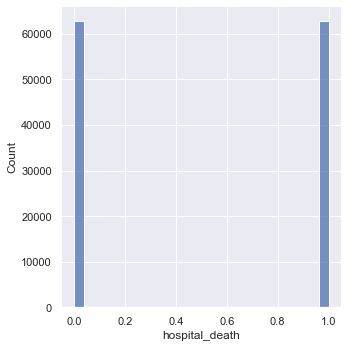

In [41]:
sns.displot(y_train)

In [42]:
#tuned_parameters = {'alpha': [10 ** a for a in range(-6, -2)]}
#clf = GridSearchCV(SGDClassifier(loss='hinge', penalty='elasticnet',l1_ratio=0.15, max_iter=5, shuffle=True, verbose=False, n_jobs=10, average=False, class_weight='balanced')
 #                 , tuned_parameters, cv=10, scoring='f1_macro')

#clf.fit(X_train, y_train)
#to find the best alpha
#print(clf.best_params_)

In [43]:
#for i in range(0, clf.best_estimator_.coef_.shape[0]):
 #   top20 = np.argsort(clf.best_estimator_.coef_[i])[-20:]
#top20

In [44]:
#j = 0
#features_imp = []
#for i in top20:
 #   features_imp.append(X_train.columns[i])

In [45]:
#features_imp

In [46]:
pipeline = Pipeline([('scalar', StandardScaler()), ('model', Lasso())])

In [47]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [48]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.250 total time=   1.8s
[CV 2/5] END .................model__alpha=0.1;, score=-0.248 total time=   1.5s
[CV 3/5] END .................model__alpha=0.1;, score=-0.193 total time=   1.5s
[CV 4/5] END .................model__alpha=0.1;, score=-0.293 total time=   1.3s
[CV 5/5] END .................model__alpha=0.1;, score=-0.293 total time=   1.4s
[CV 1/5] END .................model__alpha=0.2;, score=-0.343 total time=   1.2s
[CV 2/5] END .................model__alpha=0.2;, score=-0.341 total time=   1.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.260 total time=   1.1s
[CV 4/5] END .................model__alpha=0.2;, score=-0.382 total time=   1.3s
[CV 5/5] END .................model__alpha=0.2;, score=-0.382 total time=   1.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.347 total time=   1.5s
[CV 2/5] END .model__alpha=0.30000000000000004;

[CV 2/5] END .................model__alpha=2.1;, score=-0.345 total time=   0.7s
[CV 3/5] END .................model__alpha=2.1;, score=-0.267 total time=   0.7s
[CV 4/5] END .................model__alpha=2.1;, score=-0.391 total time=   0.6s
[CV 5/5] END .................model__alpha=2.1;, score=-0.391 total time=   0.7s
[CV 1/5] END .................model__alpha=2.2;, score=-0.347 total time=   0.6s
[CV 2/5] END .................model__alpha=2.2;, score=-0.345 total time=   0.7s
[CV 3/5] END .................model__alpha=2.2;, score=-0.267 total time=   0.8s
[CV 4/5] END .................model__alpha=2.2;, score=-0.391 total time=   0.6s
[CV 5/5] END .................model__alpha=2.2;, score=-0.391 total time=   0.7s
[CV 1/5] END ..model__alpha=2.3000000000000003;, score=-0.347 total time=   0.7s
[CV 2/5] END ..model__alpha=2.3000000000000003;, score=-0.345 total time=   0.7s
[CV 3/5] END ..model__alpha=2.3000000000000003;, score=-0.267 total time=   0.8s
[CV 4/5] END ..model__alpha=

[CV 4/5] END .................model__alpha=4.1;, score=-0.391 total time=   0.6s
[CV 5/5] END .................model__alpha=4.1;, score=-0.391 total time=   0.6s
[CV 1/5] END .................model__alpha=4.2;, score=-0.347 total time=   0.6s
[CV 2/5] END .................model__alpha=4.2;, score=-0.345 total time=   0.6s
[CV 3/5] END .................model__alpha=4.2;, score=-0.267 total time=   0.6s
[CV 4/5] END .................model__alpha=4.2;, score=-0.391 total time=   0.7s
[CV 5/5] END .................model__alpha=4.2;, score=-0.391 total time=   0.6s
[CV 1/5] END .................model__alpha=4.3;, score=-0.347 total time=   0.6s
[CV 2/5] END .................model__alpha=4.3;, score=-0.345 total time=   0.6s
[CV 3/5] END .................model__alpha=4.3;, score=-0.267 total time=   0.7s
[CV 4/5] END .................model__alpha=4.3;, score=-0.391 total time=   0.8s
[CV 5/5] END .................model__alpha=4.3;, score=-0.391 total time=   0.6s
[CV 1/5] END ..model__alpha=

[CV 1/5] END .................model__alpha=6.2;, score=-0.347 total time=   0.7s
[CV 2/5] END .................model__alpha=6.2;, score=-0.345 total time=   0.6s
[CV 3/5] END .................model__alpha=6.2;, score=-0.267 total time=   0.6s
[CV 4/5] END .................model__alpha=6.2;, score=-0.391 total time=   0.7s
[CV 5/5] END .................model__alpha=6.2;, score=-0.391 total time=   0.7s
[CV 1/5] END .................model__alpha=6.3;, score=-0.347 total time=   0.6s
[CV 2/5] END .................model__alpha=6.3;, score=-0.345 total time=   0.7s
[CV 3/5] END .................model__alpha=6.3;, score=-0.267 total time=   0.6s
[CV 4/5] END .................model__alpha=6.3;, score=-0.391 total time=   0.6s
[CV 5/5] END .................model__alpha=6.3;, score=-0.391 total time=   0.6s
[CV 1/5] END .................model__alpha=6.4;, score=-0.347 total time=   0.8s
[CV 2/5] END .................model__alpha=6.4;, score=-0.345 total time=   0.7s
[CV 3/5] END ...............

[CV 3/5] END .................model__alpha=8.2;, score=-0.267 total time=   0.7s
[CV 4/5] END .................model__alpha=8.2;, score=-0.391 total time=   0.6s
[CV 5/5] END .................model__alpha=8.2;, score=-0.391 total time=   0.7s
[CV 1/5] END .................model__alpha=8.3;, score=-0.347 total time=   1.3s
[CV 2/5] END .................model__alpha=8.3;, score=-0.345 total time=   0.7s
[CV 3/5] END .................model__alpha=8.3;, score=-0.267 total time=   0.9s
[CV 4/5] END .................model__alpha=8.3;, score=-0.391 total time=   0.7s
[CV 5/5] END .................model__alpha=8.3;, score=-0.391 total time=   0.7s
[CV 1/5] END .................model__alpha=8.4;, score=-0.347 total time=   0.9s
[CV 2/5] END .................model__alpha=8.4;, score=-0.345 total time=   0.7s
[CV 3/5] END .................model__alpha=8.4;, score=-0.267 total time=   0.6s
[CV 4/5] END .................model__alpha=8.4;, score=-0.391 total time=   0.7s
[CV 5/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [49]:
#search.best_params_

In [50]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [51]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0029799 , 0.01327161, 0.        , 0.00944505, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05098651, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00013268, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03733078, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01329784,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [52]:
features = np.array(X.columns)
features[importance > 0]

array(['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'ventilated_apache', 'd1_mbp_min', 'd1_sysbp_min', 'd1_bun_max',
       'apache_4a_hospital_death_prob',
       'icu_admit_source_Accident & Emergency',
       'icu_admit_source_Operating Room / Recovery',
       'apache_3j_bodysystem_Cardiovascular'], dtype=object)

In [53]:
data_model = data
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,66154.0,25312.0,118.0,0.0,68.0,22.730000,0.0,180.3,92.0,0.541667,...,1,0,0,0,0,0,0,0,0,0
1,114252.0,59342.0,81.0,0.0,77.0,27.420000,0.0,160.0,90.0,0.927778,...,0,0,0,0,0,0,1,0,0,0
2,119783.0,50777.0,118.0,0.0,25.0,31.950000,0.0,172.7,93.0,0.000694,...,0,0,0,1,0,0,0,0,0,0
3,79267.0,46918.0,118.0,0.0,81.0,22.640000,1.0,165.1,92.0,0.000694,...,1,0,0,0,0,0,0,0,0,0
4,92056.0,34377.0,33.0,0.0,19.0,23.450505,0.0,188.0,91.0,0.073611,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592.0,78108.0,30.0,0.0,75.0,23.060250,0.0,177.8,927.0,0.298611,...,1,0,0,0,0,0,0,0,0,0
91709,66119.0,13486.0,121.0,0.0,56.0,47.179671,0.0,183.0,925.0,0.120139,...,1,0,0,0,0,0,0,0,0,0
91710,8981.0,58179.0,195.0,0.0,48.0,27.236914,0.0,170.2,908.0,0.046528,...,0,0,0,1,0,0,0,0,0,0
91711,33776.0,120598.0,66.0,0.0,53.8,23.297481,0.0,154.9,922.0,0.081944,...,0,0,0,0,0,0,1,0,0,0


In [54]:
if set(['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'ventilated_apache', 'd1_mbp_min', 'd1_sysbp_min', 'd1_bun_max',
       'apache_4a_hospital_death_prob']).issubset(test.columns):
   print('numerical feature') 

numerical feature


In [55]:
data_model = data
data_model = data_model.loc[:, data_model.columns.intersection(['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'ventilated_apache', 'd1_mbp_min', 'd1_sysbp_min', 'd1_bun_max',
       'apache_4a_hospital_death_prob',
       'icu_admit_source_Accident & Emergency','icu_admit_source_Floor', 'icu_admit_source_Other Hospital', 'icu_admit_source_Other ICU', 
       'icu_admit_source_Operating Room / Recovery',
       'apache_3j_bodysystem_Cardiovascular', 'apache_3j_bodysystem_Sepsis','apache_3j_bodysystem_Respiratory','apache_3j_bodysystem_Metabolic', 'apache_3j_bodysystem_Trauma','apache_3j_bodysystem_Neurological','apache_3j_bodysystem_Gastrointestinal','apache_3j_bodysystem_Genitourinary','apache_3j_bodysystem_Musculoskeletal/Skin','apache_3j_bodysystem_Hematological'])]
data_model

,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,ventilated_apache,d1_mbp_min,d1_sysbp_min,d1_bun_max,apache_4a_hospital_death_prob,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,...,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma
0,3.0,6.0,4.0,0.0,46.0,73.0,31.00,0.100,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1.0,3.0,1.0,1.0,38.0,67.0,11.00,0.470,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3.0,6.0,5.0,0.0,68.0,105.0,23.20,0.000,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4.0,6.0,5.0,1.0,84.0,84.0,25.20,0.040,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.4,5.8,3.0,0.0,90.0,120.0,53.00,0.176,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,4.0,6.0,5.0,1.0,48.0,67.0,27.00,0.120,0,1,...,0,0,0,0,0,0,0,0,1,0
91709,4.0,6.0,5.0,0.0,47.0,65.0,34.00,0.030,0,1,...,0,0,0,0,0,0,0,0,1,0
91710,3.0,6.0,4.0,0.0,57.0,75.0,33.00,0.050,1,0,...,0,0,0,0,1,0,0,0,0,0
91711,4.0,5.0,4.0,0.0,54.0,111.0,19.98,0.070,1,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
balanced_X = data_model.loc[:,data_model.columns != 'hospital_death']
balanced_y = data['hospital_death']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_y, test_size = 0.25, random_state = 12)

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20726,   251],
       [ 1549,   403]], dtype=int64)

Text(0.5, 1588.0, 'Predicted label')

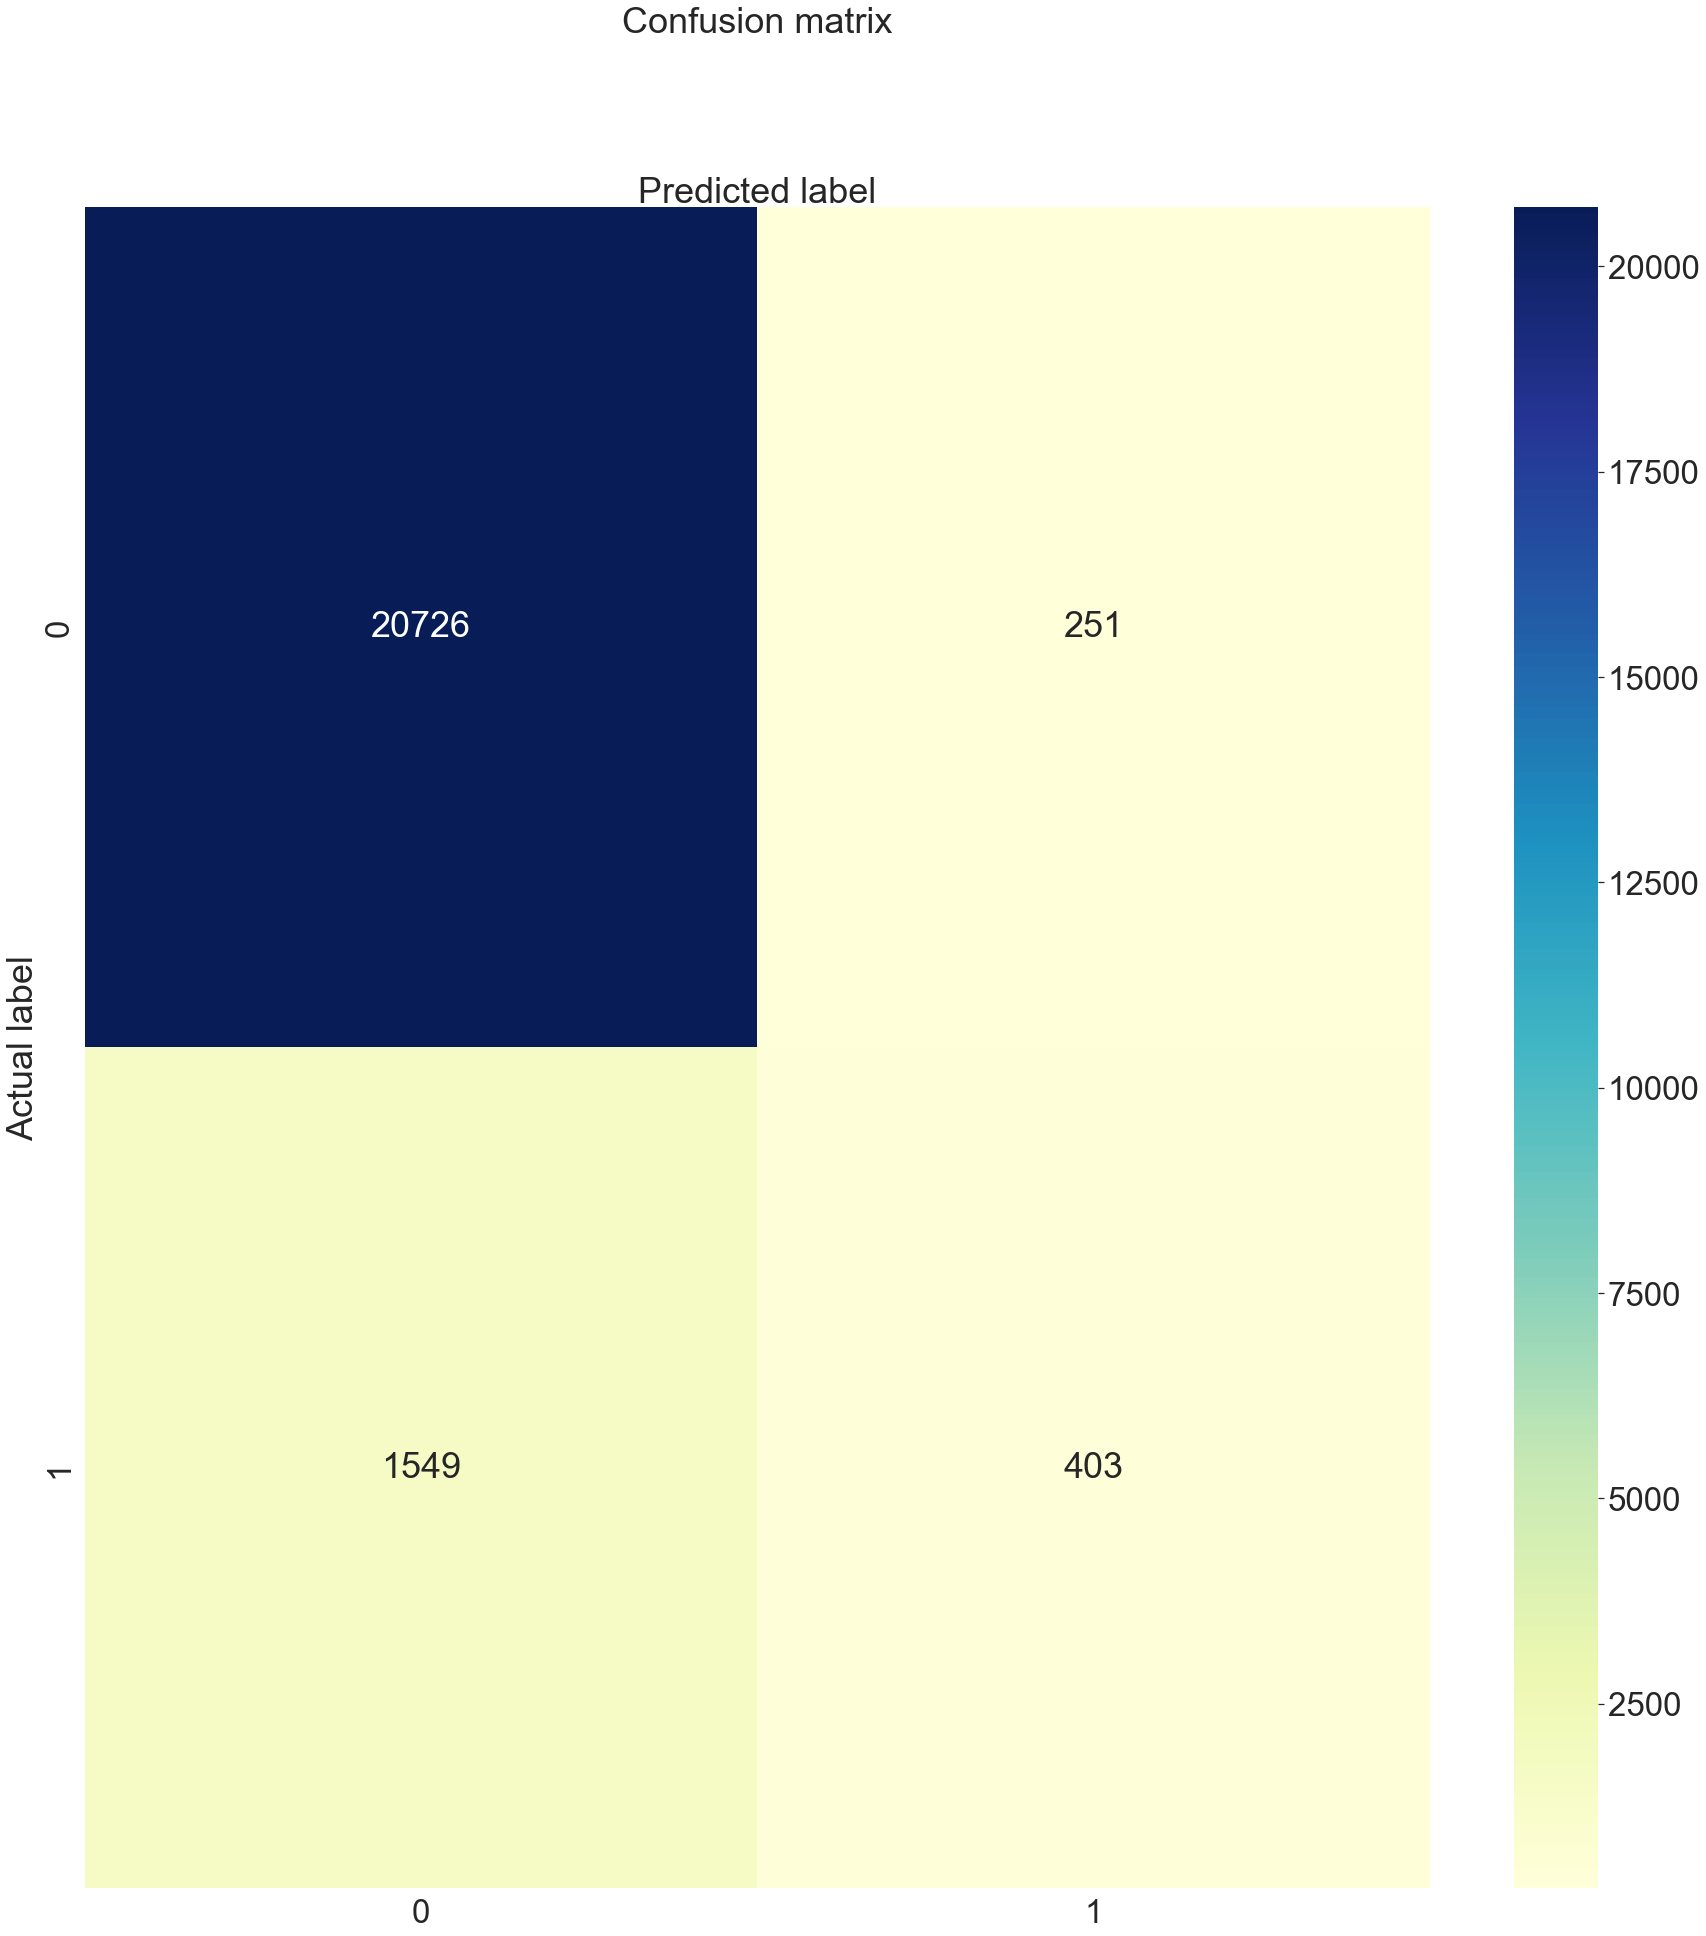

In [60]:
sns.set(font_scale = 3.0)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9214967944524401
Precision: 0.6162079510703364
Recall: 0.20645491803278687
F1_score: 0.30928626247122026


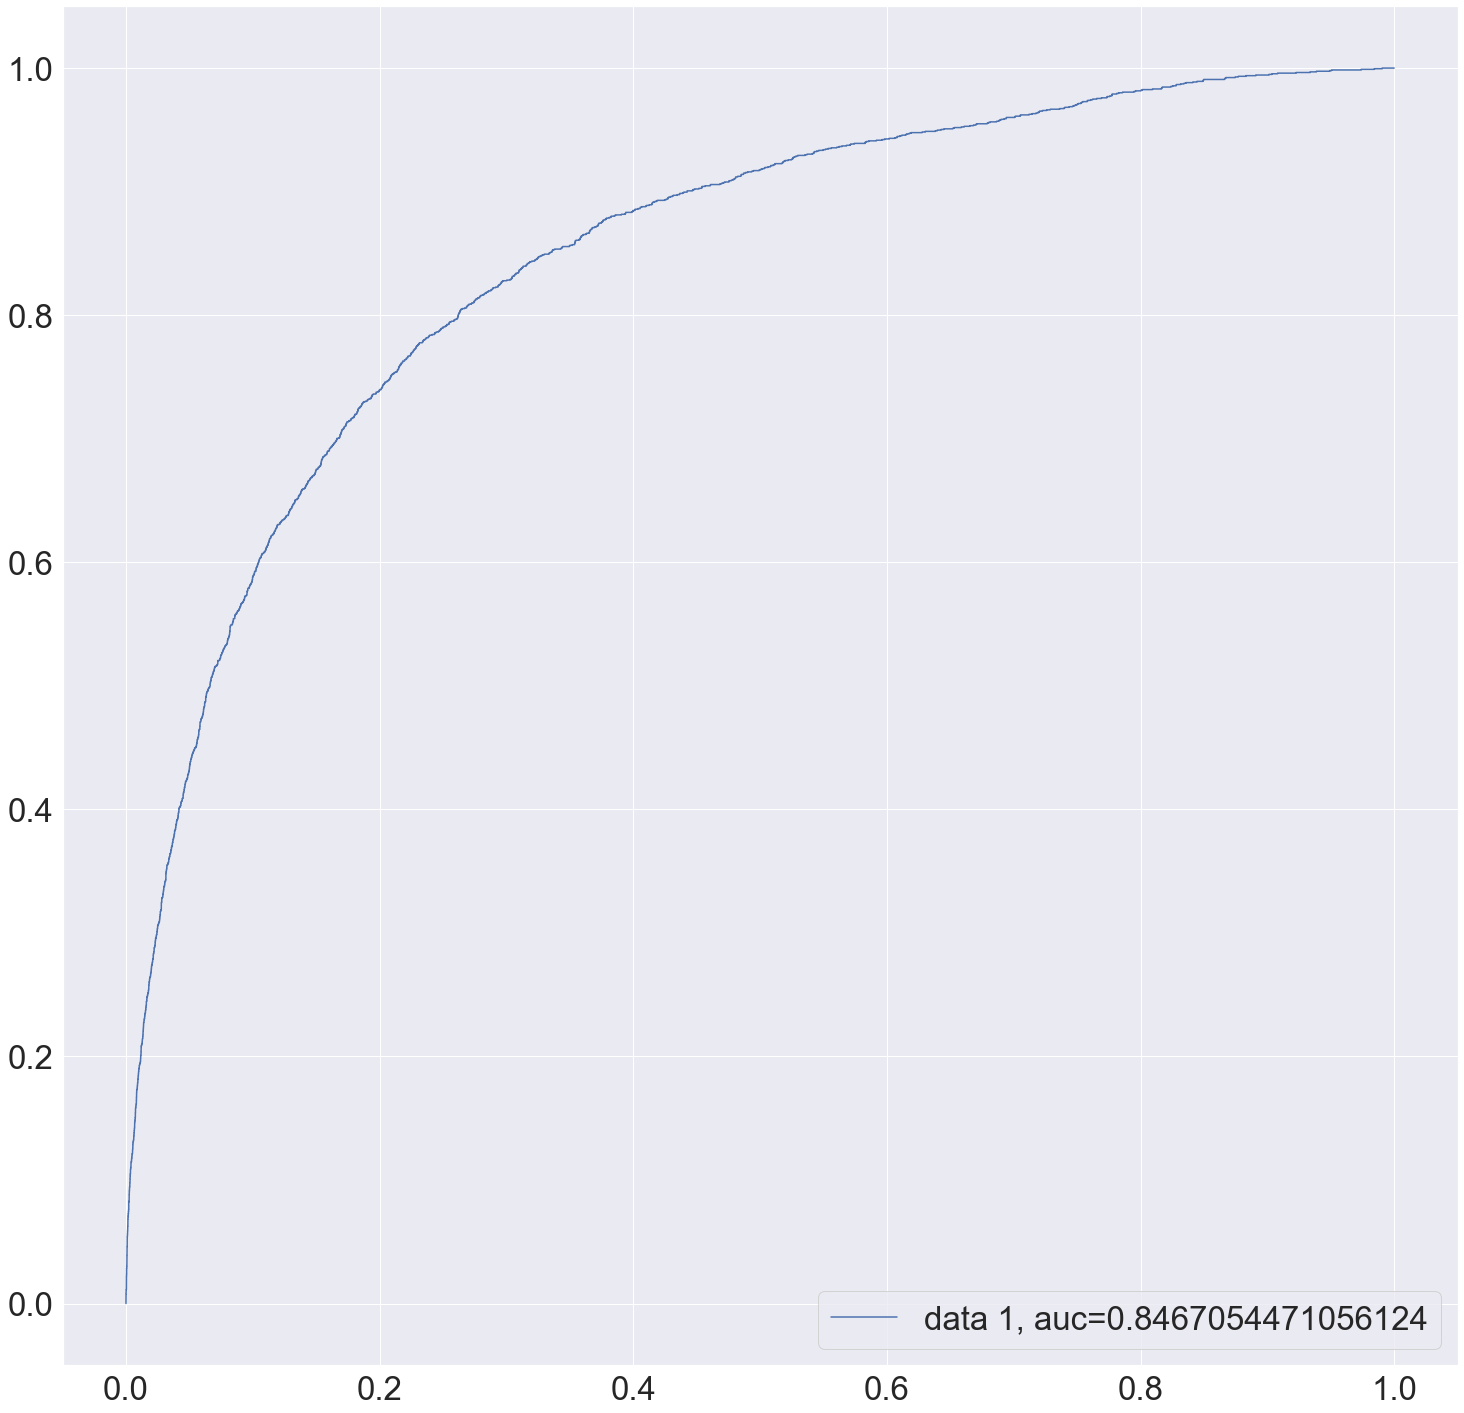

In [62]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy: 0.8739587422041956
Precision: 0.29229406554472986
Recall: 0.33811475409836067
F1_score: 0.31353919239904987


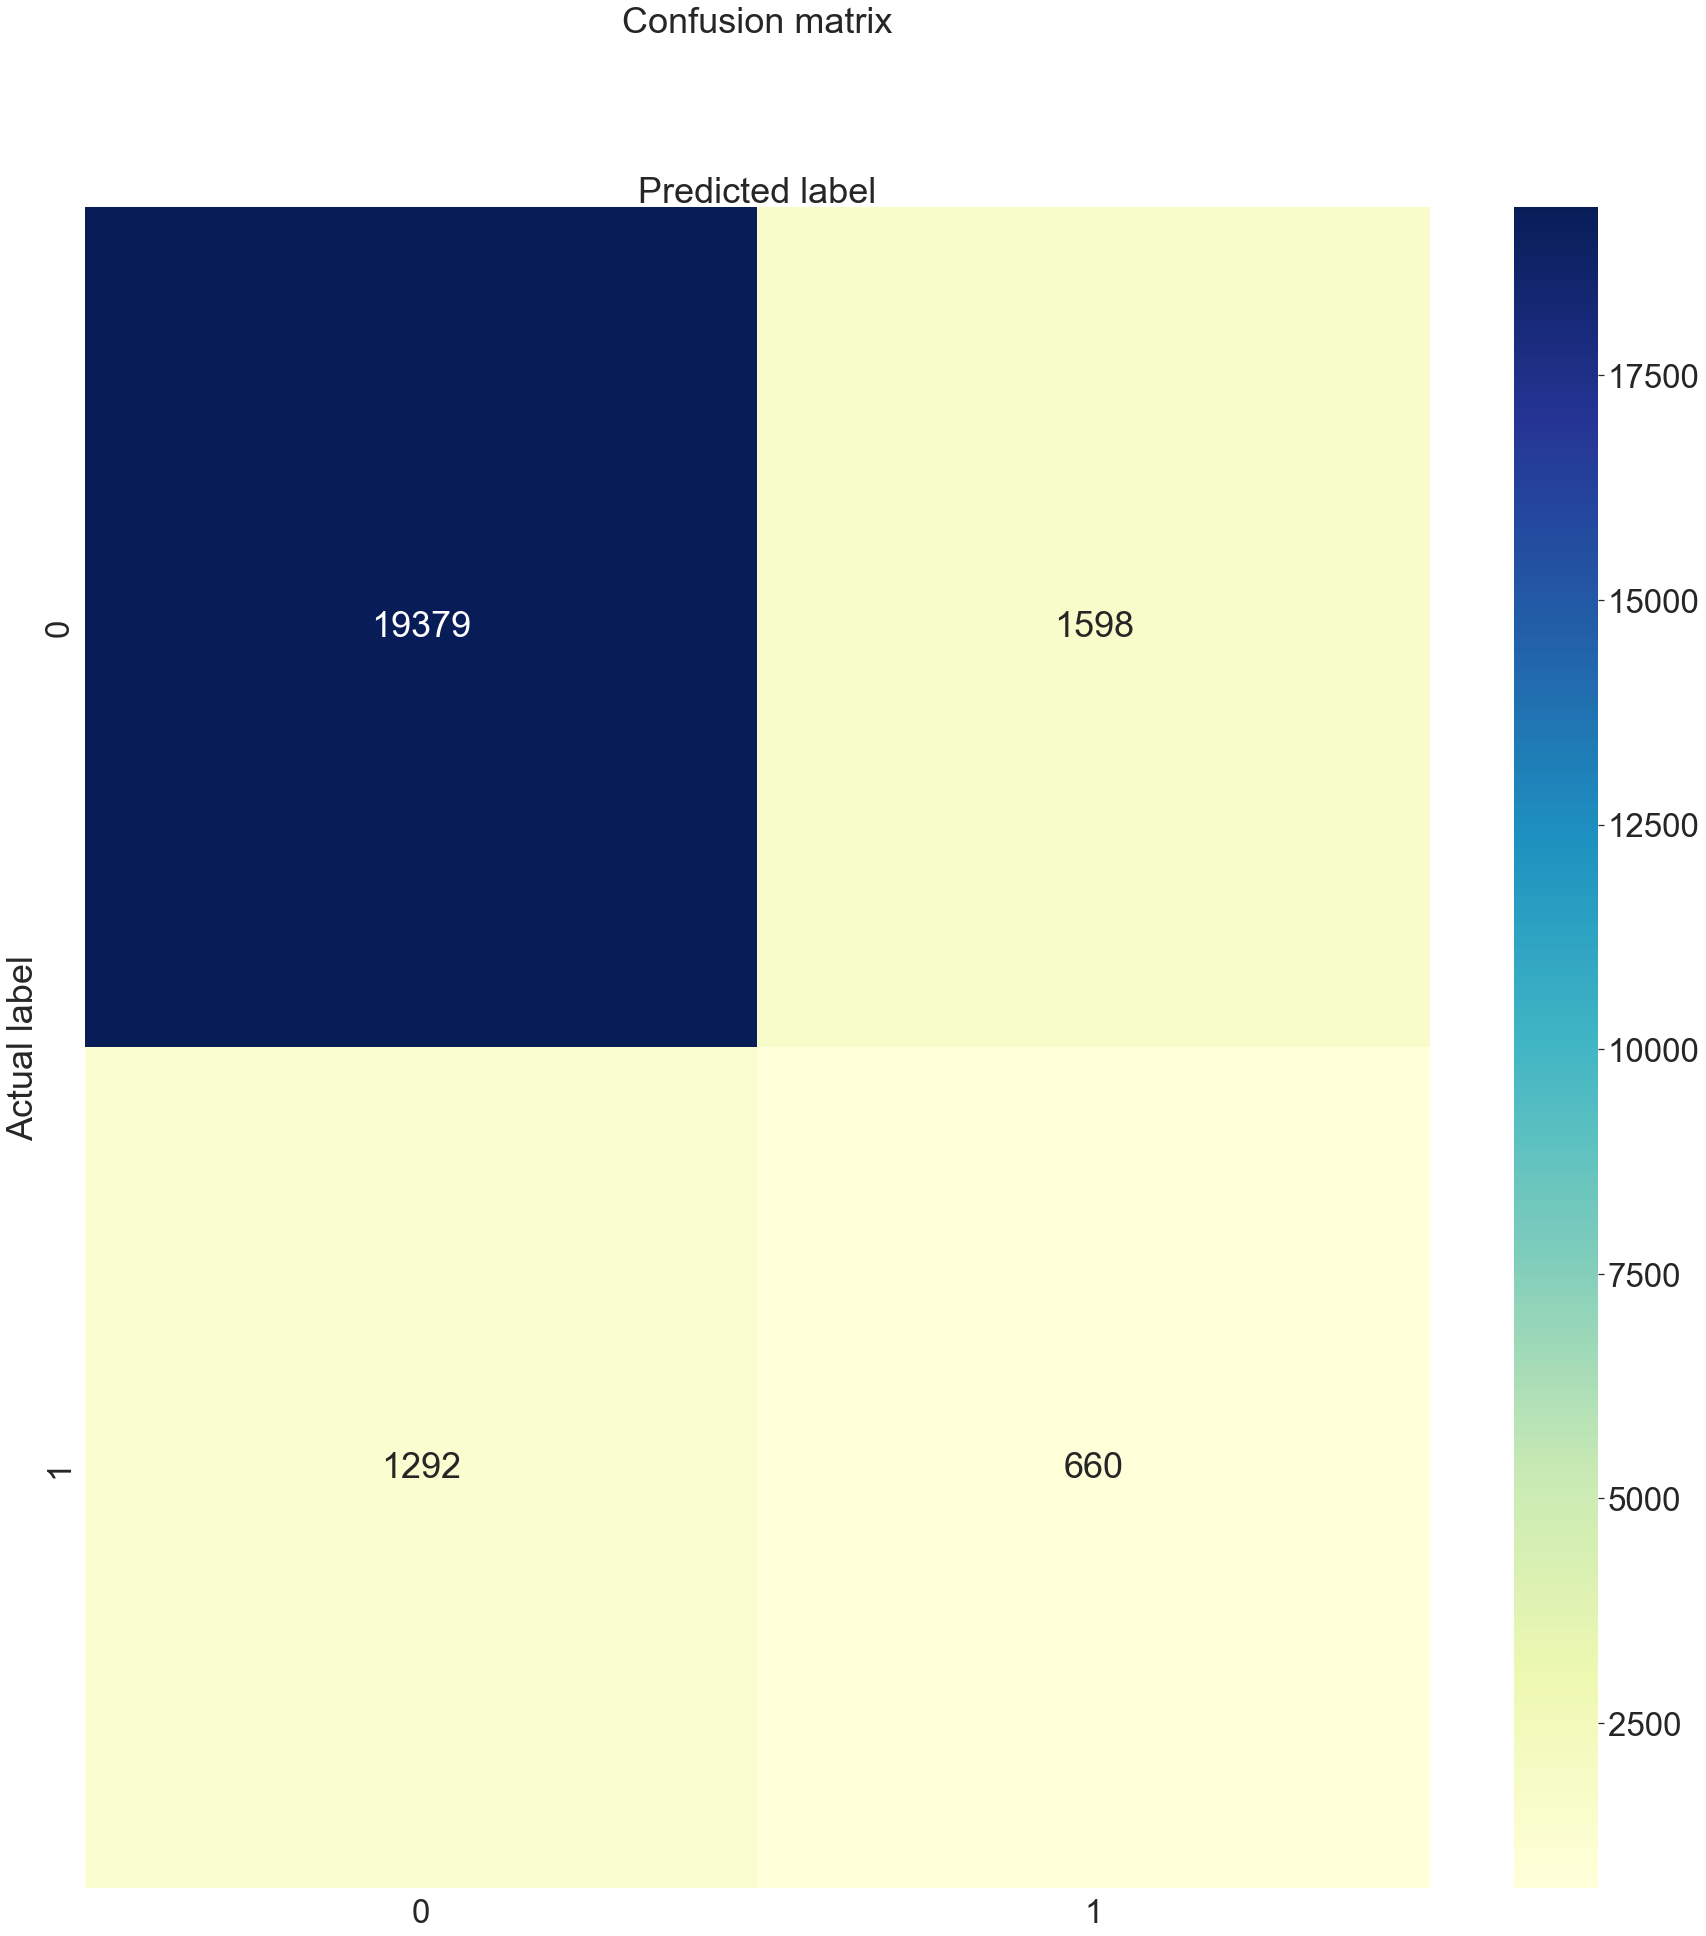

In [63]:
DTclf = tree.DecisionTreeClassifier()
DTclf = DTclf.fit(X_train, y_train)
y_pred_dtclf = DTclf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dtclf)
sns.set(font_scale = 3.0)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtclf))
print("Precision:",metrics.precision_score(y_test, y_pred_dtclf))
print("Recall:",metrics.recall_score(y_test, y_pred_dtclf))
print("F1_score:",metrics.f1_score(y_test, y_pred_dtclf))

Accuracy: 0.9234157616991583
Precision: 0.6695501730103807
Recall: 0.19825819672131148
F1_score: 0.3059288537549407


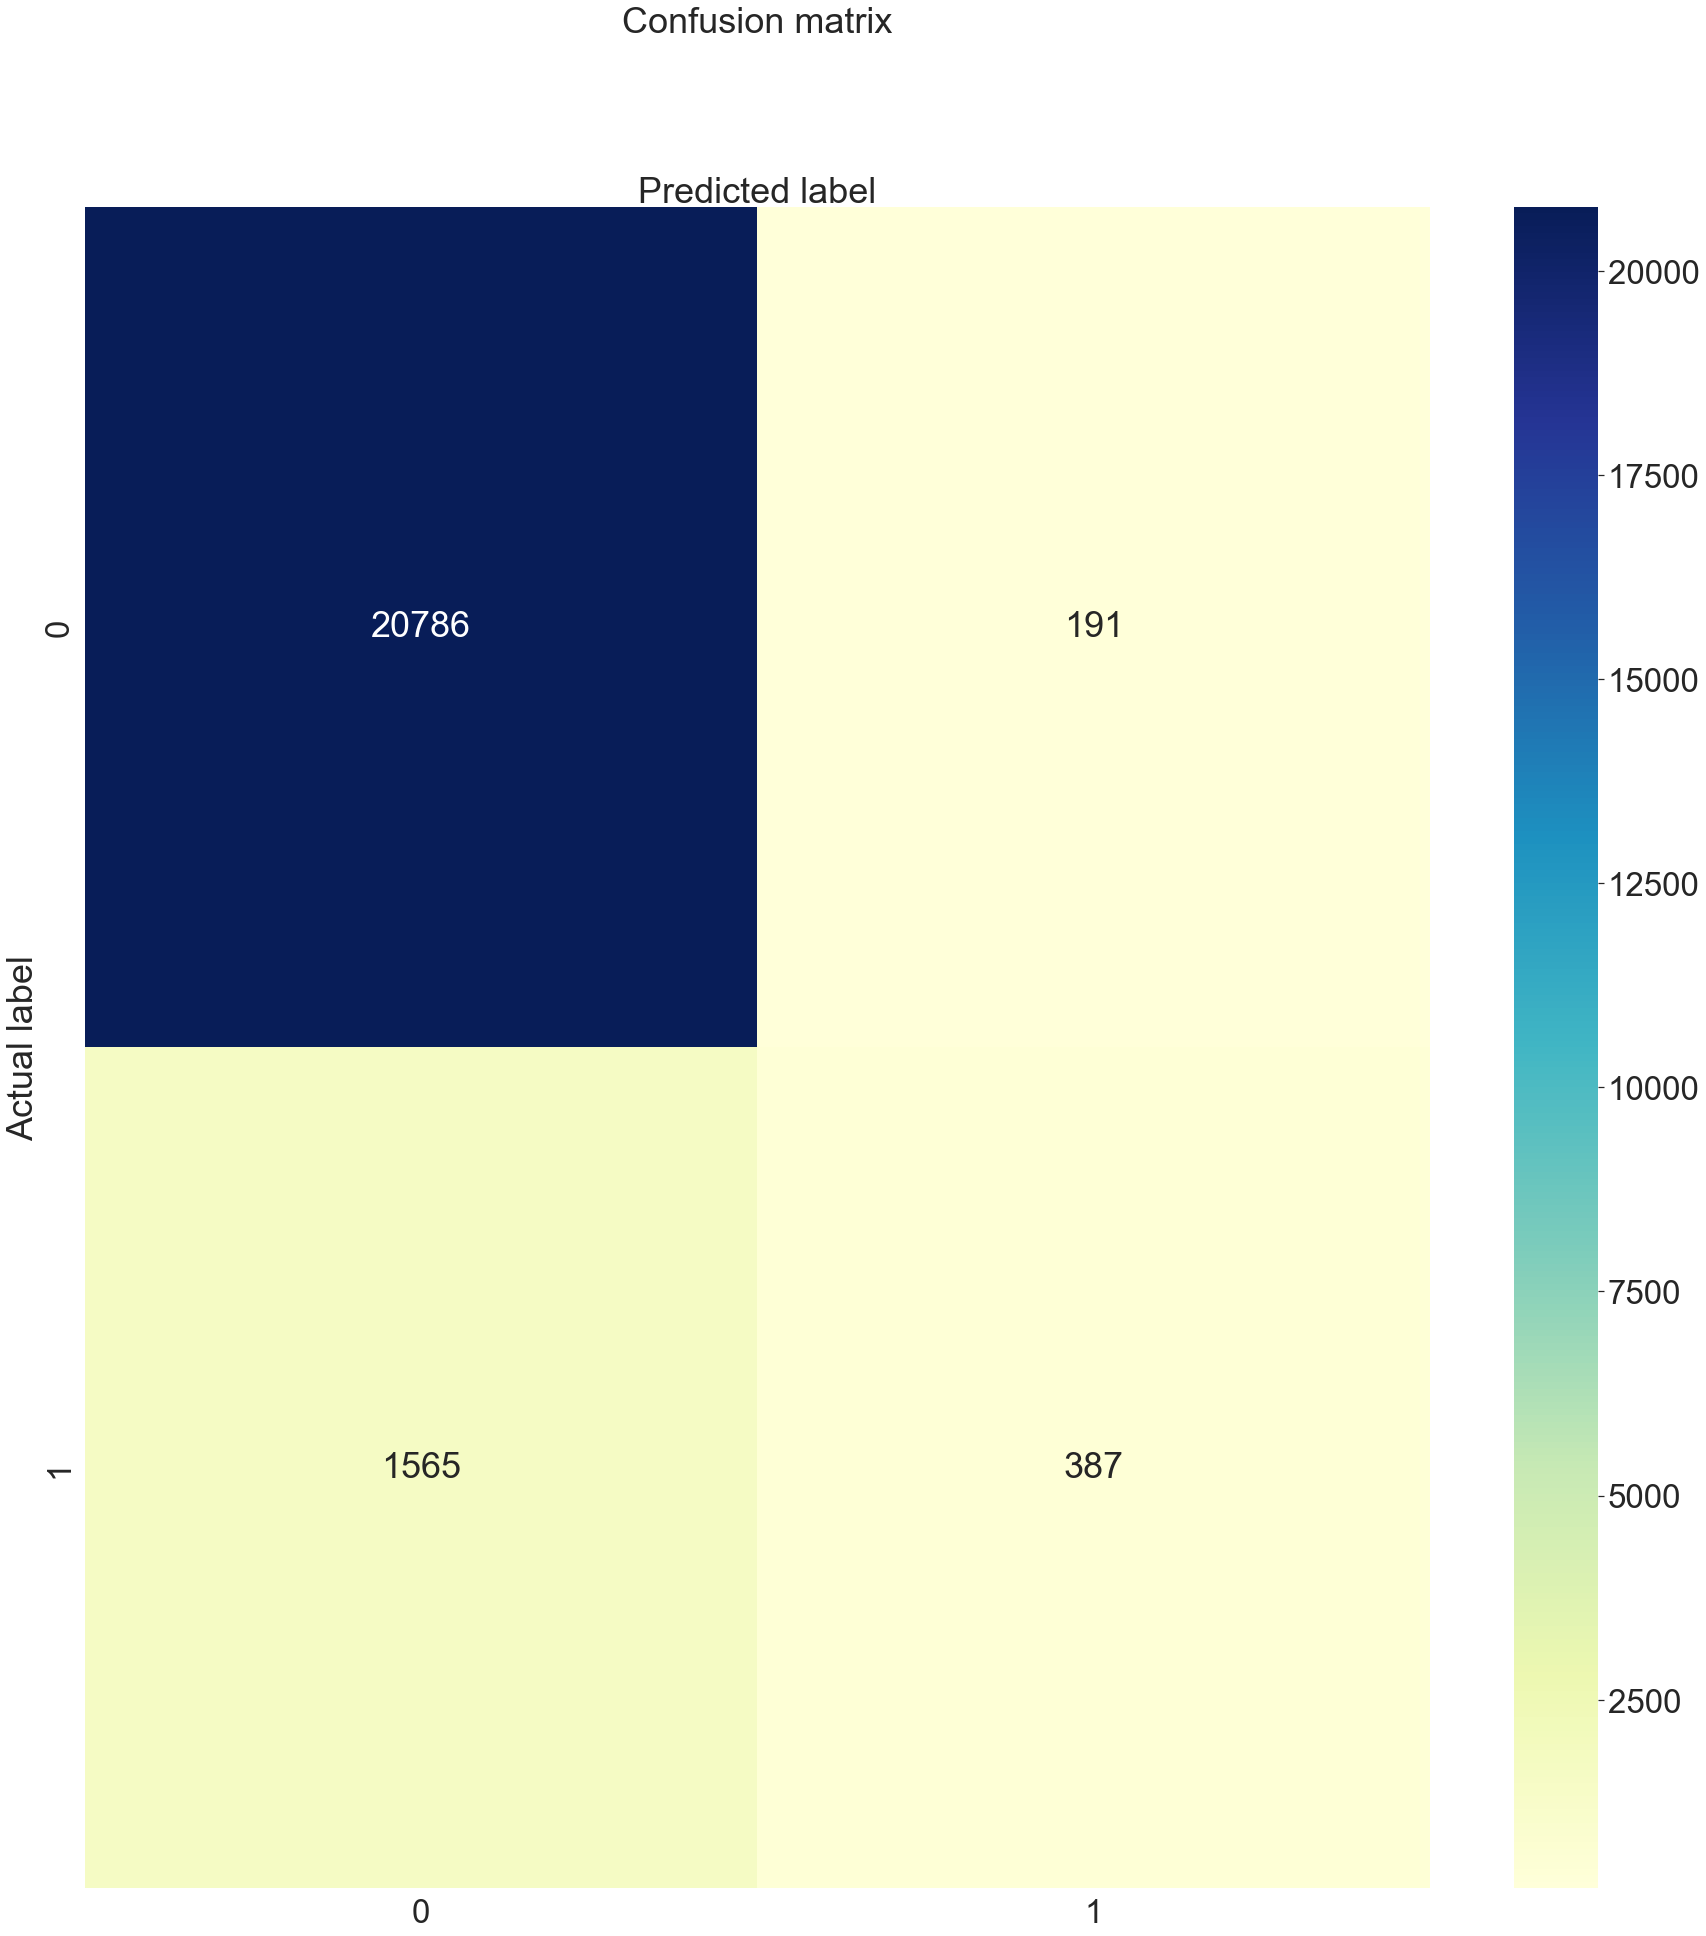

In [65]:
SVMclf = svm.SVC(kernel='linear')
SVMclf.fit(X_train, y_train)
y_pred_svm = SVMclf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
sns.set(font_scale = 3.0)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))
print("F1_score:",metrics.f1_score(y_test, y_pred_svm))

Accuracy: 0.9144751188451307
Precision: 0.49343065693430654
Recall: 0.17315573770491804
F1_score: 0.2563519150549867


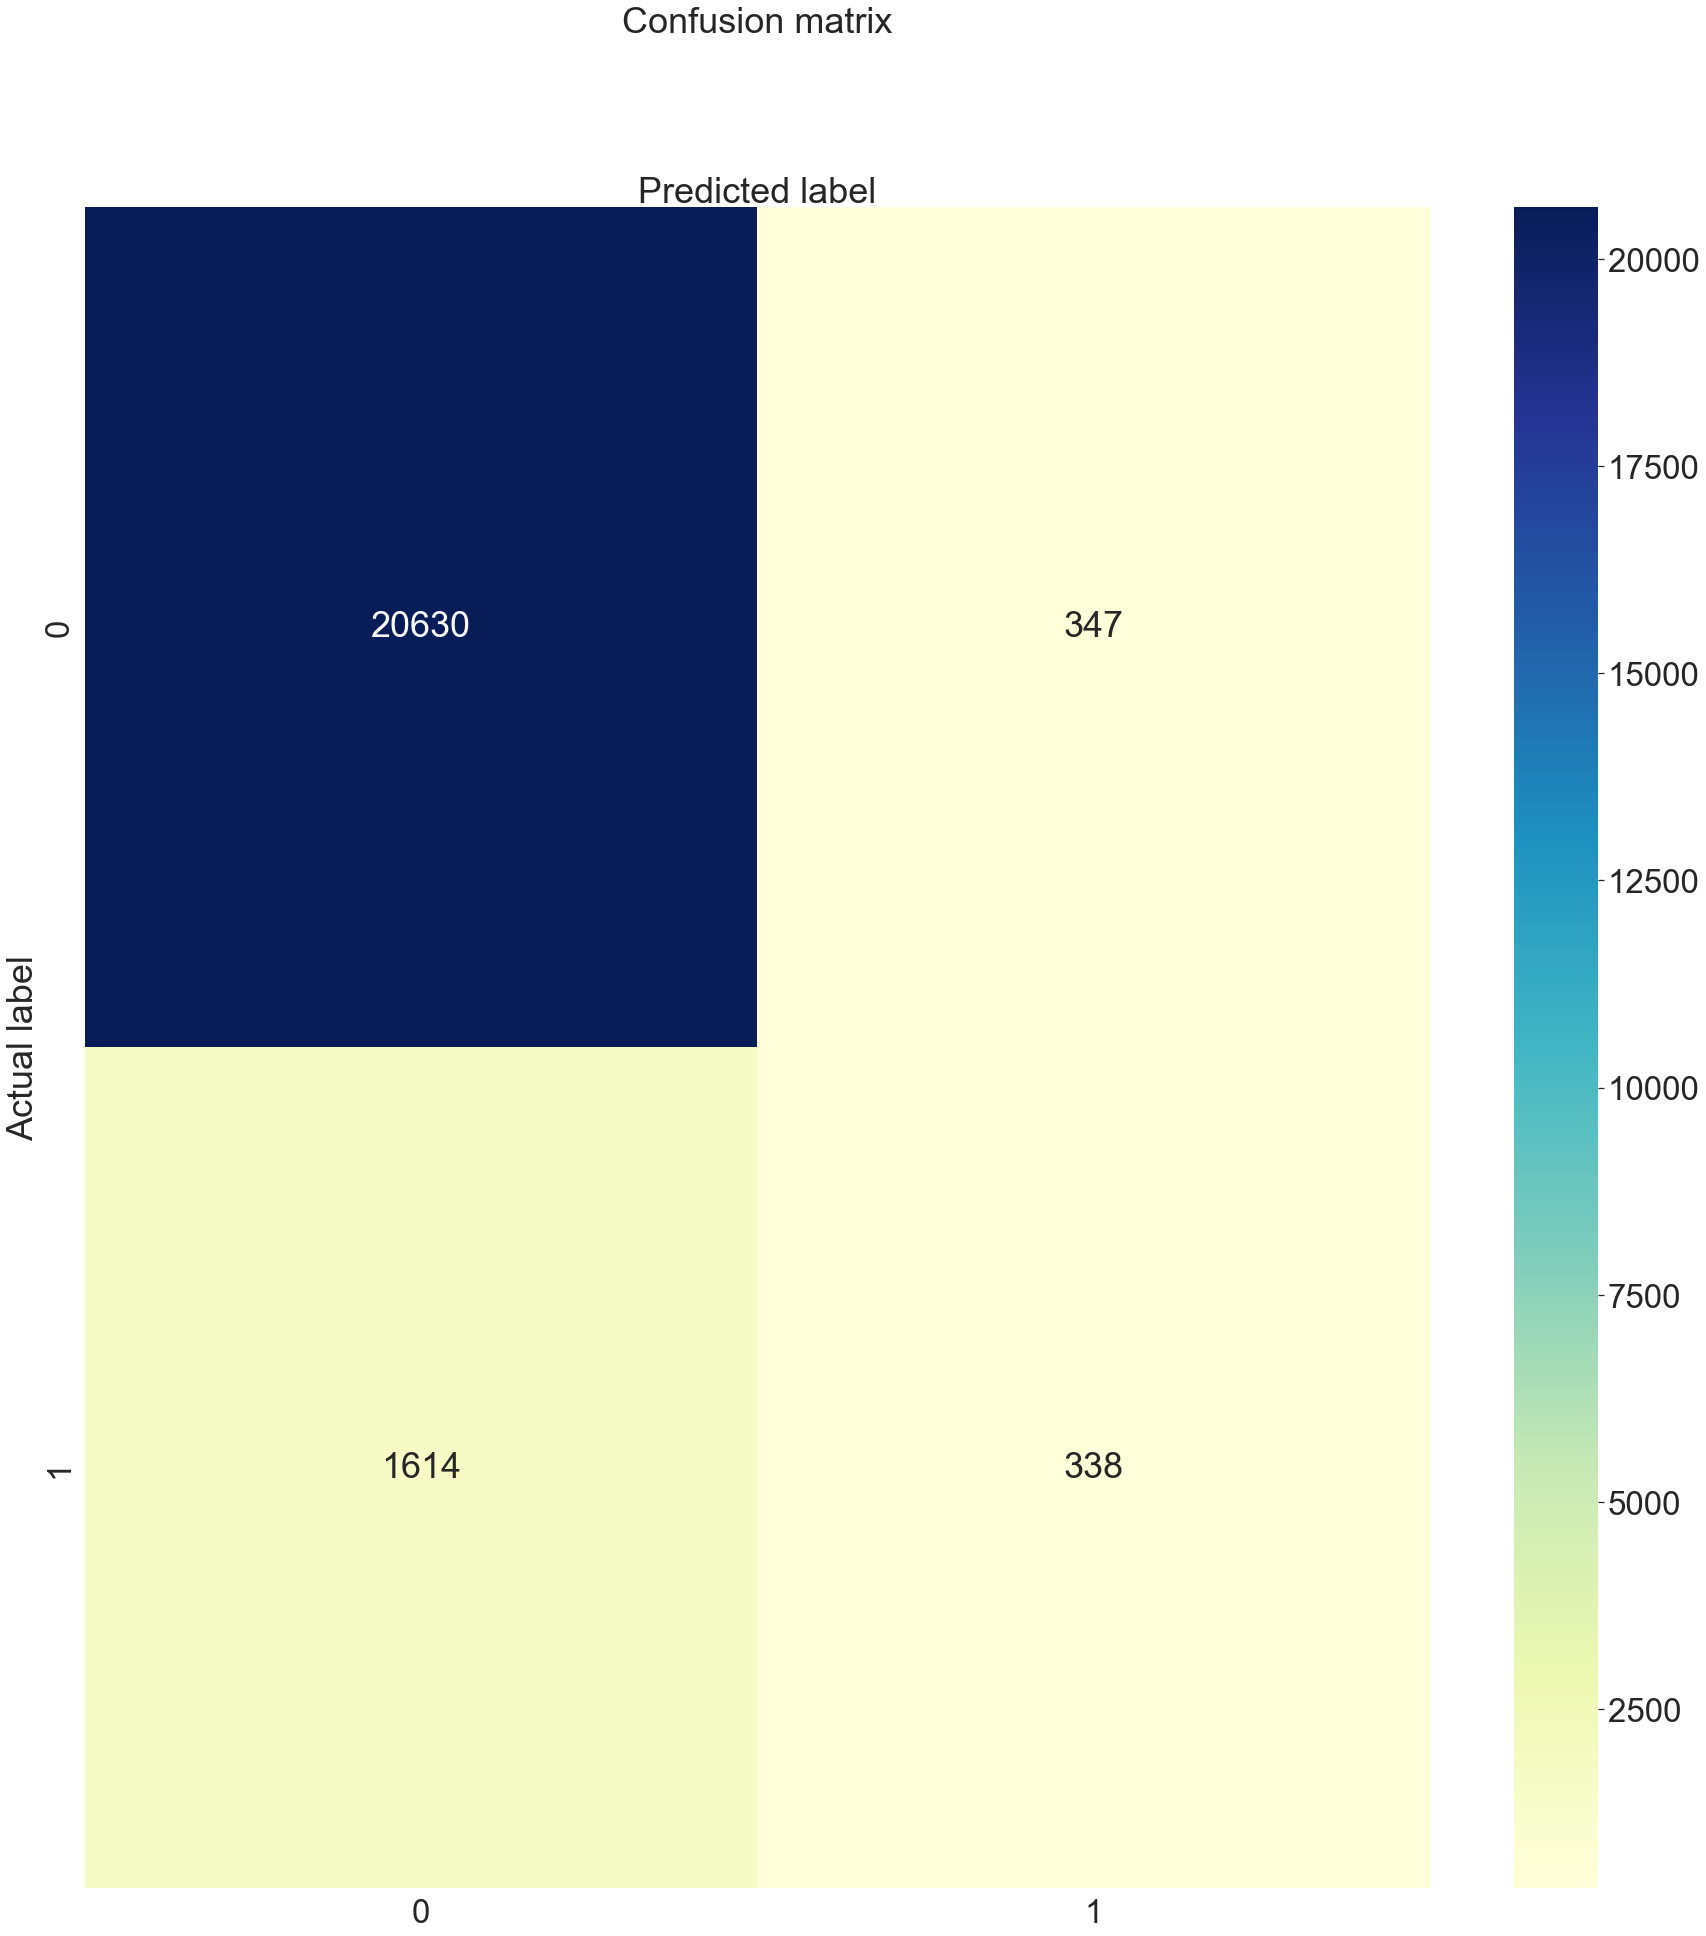

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
sns.set(font_scale = 3.0)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))
print("F1_score:",metrics.f1_score(y_test, y_pred_knn))